# Project_MAAC

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import statsmodels.formula.api as smf
import math
import statsmodels.formula.api as sm
import itertools
import time

In [6]:
data = pd.read_csv('data.csv', sep=';') 

In [15]:
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_dum
0,30,Employed,married,Primary,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,Employed,single,Secondary,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,Employed,married,Secondary,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
4,47,Employed,married,Tertiary,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0
5,32,Employed,single,Tertiary,no,no,cellular,sep,thu,128,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,0


## Data Cleaning & Preparation

### Binning the catogorical data

In [10]:
data['education'] = data['education'].apply(lambda x:'Primary' if 'basic' in x else 'Primary' if 'illiterate' in x else 'Secondary' if 'high.school' in x else 'Secondary' if 'professional.course' in x else 'Tertiary' if 'university.degree' in x else x)
data['job'] = data['job'].apply(lambda x:'Employed' if 'admin.' in x else 'Employed' if 'blue-collar' in x else 'Employed' if 'technician' in x else 'Employed' if 'services' in x else 'Employed' if 'management' in x else 'Employed' if 'self-employed' in x else 'Employed' if 'entrepreneur' in x else 'Unemployed' if 'retired' in x else 'Unemployed' if 'unemployed' in x else 'Unemployed' if 'housemaid' in x else 'Unemployed' if 'student' in x else x)
data['marital'] = data['marital'].apply(lambda x:'single' if 'divorce' in x else x)

### Cleaning the missing values

In [11]:
data['education']=data['education'].replace('unknown',np.NaN)
data['marital']=data['marital'].replace('unknown',np.NaN)
data['housing']=data['housing'].replace('unknown',np.NaN)
data['loan']=data['loan'].replace('unknown',np.NaN)
data['job']=data['job'].replace('unknown',np.NaN)

data.drop(['default'], axis=1, inplace = True)
data.dropna(axis=0, inplace=True)

In [12]:
data['y_dum']= data['y'].map({'no': 0, 'yes': 1})

In [14]:
data.drop(['y'], axis=1, inplace = True)

KeyError: "['y'] not found in axis"

## Rename the column

In [16]:
data = data.rename(columns={'emp.var.rate': 'emp_var_rate', 'cons.price.idx': 'cons_price_idx', 'cons.conf.idx': 'cons_conf_idx', 'nr.employed': 'nr_employed'})

In [17]:
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y_dum
0,30,Employed,married,Primary,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,Employed,single,Secondary,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,Employed,married,Secondary,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
4,47,Employed,married,Tertiary,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0
5,32,Employed,single,Tertiary,no,no,cellular,sep,thu,128,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,0


## Split the Dataset

In [18]:
# Creating training and testing datasets
np.random.seed(2)
train = data.sample(round(data.shape[0]*0.8))
test = data.drop(train.index)

In [19]:
train.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y_dum
398,45,Employed,single,Tertiary,no,yes,cellular,may,fri,133,1,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,0
526,38,Employed,married,Tertiary,no,no,telephone,may,tue,477,11,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3707,60,Unemployed,married,Secondary,no,no,cellular,may,thu,181,3,6,1,success,-1.8,93.876,-40.0,0.699,5008.7,1
3687,30,Employed,single,Tertiary,no,no,cellular,sep,thu,327,2,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,1
618,31,Employed,married,Tertiary,no,no,telephone,may,wed,197,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


In [20]:
test.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y_dum
6,32,Employed,single,Tertiary,yes,no,cellular,sep,mon,290,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,0
10,25,Employed,single,Primary,yes,no,cellular,jul,thu,301,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
20,55,Employed,married,Primary,yes,no,cellular,jul,tue,326,6,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
25,38,Employed,married,Secondary,yes,no,cellular,aug,mon,479,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,1
26,36,Employed,single,Secondary,no,no,telephone,may,wed,446,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0


## Data Preparation

### Check Missing Value

In [11]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y_dum             0
dtype: int64

### Check VIF


In [12]:
train_dummies=pd.get_dummies(train.iloc[:,0:])

In [13]:
X = train_dummies[['age', 'duration','campaign','pdays','previous','emp_var_rate','cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'job_Employed', 'marital_married', 'education_Primary', 'housing_no', 'loan_no', 'contact_cellular', 'month_mar', 'poutcome_success', 'day_of_week_fri']]

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["y_dum"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

                y_dum            VIF
0               const  683321.112966
1                 age       1.179976
2            duration       1.023457
3            campaign       1.049168
4               pdays      13.636122
5            previous       1.800038
6        emp_var_rate      38.039553
7      cons_price_idx       9.754661
8       cons_conf_idx       2.911788
9           euribor3m      61.875972
10        nr_employed      32.944098
11       job_Employed       1.097603
12    marital_married       1.106985
13  education_Primary       1.084024
14         housing_no       1.019776
15            loan_no       1.007851
16   contact_cellular       2.095999
17          month_mar       1.060823
18   poutcome_success      12.647102
19    day_of_week_fri       1.005511


### Eliminate Variables based on VIF 
Disregard "pdays","emp_var_rate","cons_price_idx","euribor3m","nr_employed","poutcome" because their VIFs are larger than 5.

## EDA

### Visualization Heatmap

<AxesSubplot:>

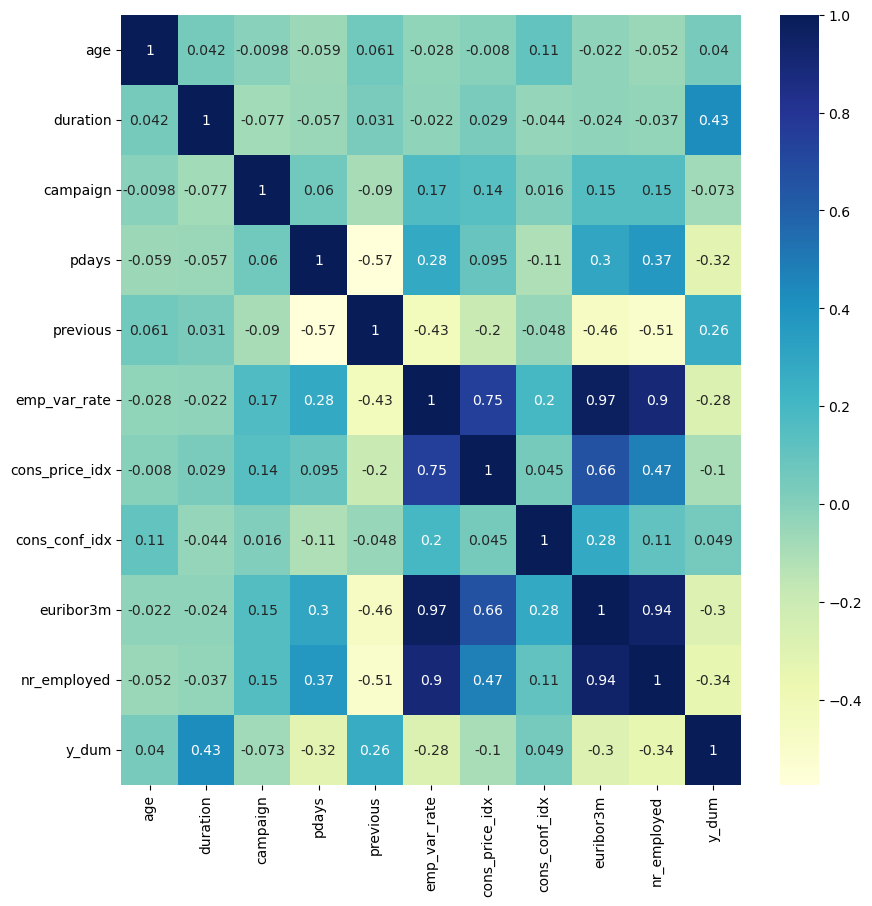

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)

### Visualizations with individual predictors

[Text(0.5, 0, 'Marital Status'), Text(0, 0.5, 'subscription_rate')]

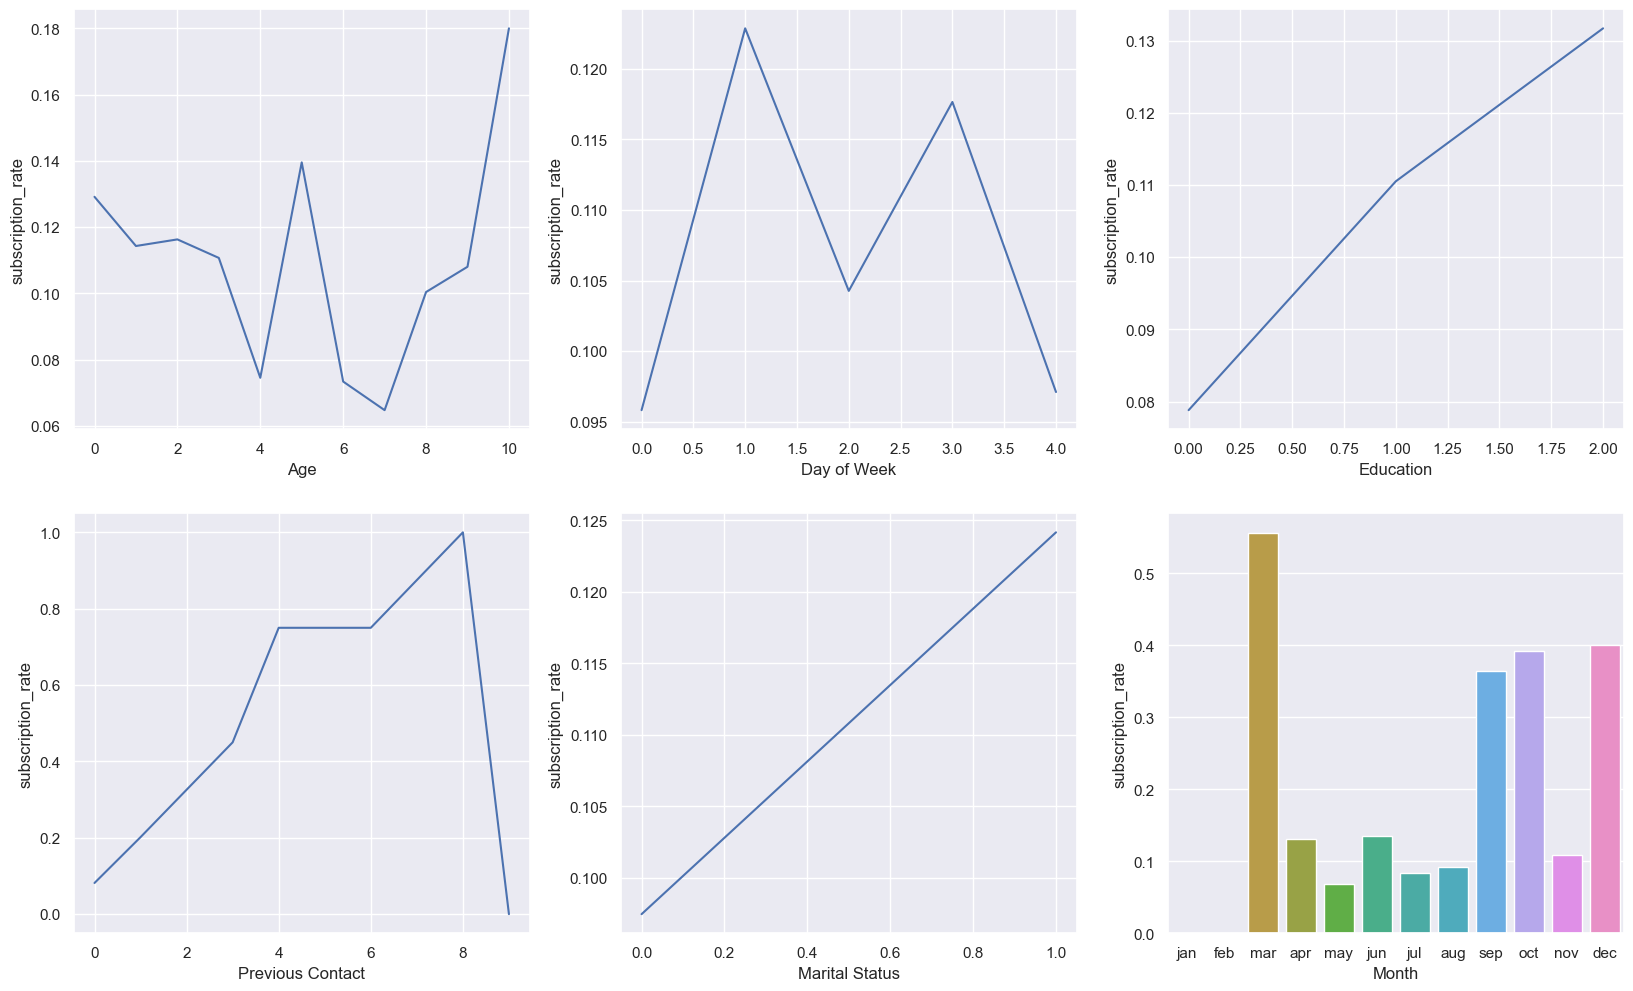

In [16]:
sns.set(rc={'figure.figsize':(20,12)})
fig, axes = plt.subplots(nrows=2, ncols=3)
#Plotting individual subplots

#Binning Age
binned_age = pd.qcut(train['age'],11,retbins=True)
train['age_binned'] = binned_age[0]
age_data = train.groupby('age_binned')['y_dum'].agg([('subscription_rate','mean'),('nobs','count')]).reset_index(drop=False)
#Age Graph
sns.set(rc={'figure.figsize':(10,6)})
ax_age = sns.lineplot(x = age_data.index, y= age_data['subscription_rate'], ax=axes[0,0])
ax_age.set(xlabel='Age', ylabel='subscription_rate')


#Day of Week Graph
day_data = train.groupby('day_of_week')['y_dum'].agg([('subscription_rate','mean'),('nobs','count')]).reset_index(drop=False)
ax_day = sns.lineplot(x = day_data.index, y= day_data['subscription_rate'], ax = axes[0,1])
ax_day.set(xlabel='Day of Week', ylabel='subscription_rate')

#Education Graph
edu_data = train.groupby('education')['y_dum'].agg([('subscription_rate','mean'),('nobs','count')]).reset_index(drop=False)
ax_edu = sns.lineplot(x = edu_data.index, y= edu_data['subscription_rate'], ax = axes[0,2])
ax_edu.set(xlabel='Education', ylabel='subscription_rate')

#Month Graph
month_data = train.groupby('month')['y_dum'].agg([('subscription_rate','mean'),('nobs','count')])
ax_month = sns.barplot(x = month_data.index, y= month_data['subscription_rate'], order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], ax = axes[1,2])
ax_month.set(xlabel='Month', ylabel='subscription_rate')


#Binning number of previous contacts
binned_previous = pd.cut(train['previous'],10, retbins=True, duplicates='drop')
train['previous_binned'] = binned_previous[0]
previous_data = train.groupby('previous_binned')['y_dum'].agg([('subscription_rate','mean'),('nobs','count')]).reset_index(drop=False)
#Previous Contact Graph
sns.set(rc={'figure.figsize':(10,6)})
ax_previous = sns.lineplot(x = previous_data.index, y= previous_data['subscription_rate'], ax = axes[1,0])
ax_previous.set(xlabel='Previous Contact', ylabel='subscription_rate')

#Marital Status Graph
marital_data = train.groupby('marital')['y_dum'].agg([('subscription_rate','mean'),('nobs','count')]).reset_index(drop=False)
ax_marital = sns.lineplot(x = marital_data.index, y= marital_data['subscription_rate'], ax = axes[1,1])
ax_marital.set(xlabel='Marital Status', ylabel='subscription_rate')


## Observations from Visualizations
**Age**:A quadratic transformation of age seems to better fit for "Age"

**Day of Week**:

**Education**

**Previous Contact**

## Model

In [21]:
from sklearn.metrics import roc_curve, auc

#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

### Baseline Model

In [18]:
train.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'y_dum', 'age_binned', 'previous_binned'],
      dtype='object')

In [22]:
logit_model_Baseline = sm.logit(formula = 'y_dum~age+job+marital+education+housing+loan+contact+month+day_of_week+campaign+pdays+previous+poutcome+euribor3m+emp_var_rate+cons_price_idx+cons_conf_idx+nr_employed', data = train).fit()
logit_model_Baseline.summary()

Optimization terminated successfully.
         Current function value: 0.267965
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  y_dum   No. Observations:                 3049
Model:                          Logit   Df Residuals:                     3017
Method:                           MLE   Df Model:                           31
Date:                Thu, 02 Mar 2023   Pseudo R-squ.:                  0.2167
Time:                        17:45:37   Log-Likelihood:                -817.03
converged:                       True   LL-Null:                       -1043.1
Covariance Type:            nonrobust   LLR p-value:                 2.878e-76
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -251.4789    118.053     -2.130      0.033    -482.859     -20.099
job[T.Unemployed]           0.0839      0.201      0.417      0.677      -0.311       0.478
marital[T.single]           0.0337      0.142      0.237      0.813      -0.245       0.313
education[T.Secondary]      0.1253      0.177      0.710      0.478      -0.221       0.472
education[T.Tertiary]       0.1775      0.183      0.971      0.331      -0.181       0.536
housing[T.yes]             -0.1000      0.135     -0.740      0.459      -0.365       0.165
loan[T.yes]                -0.0687      0.185     -0.371      0.710      -0.431       0.294
contact[T.telephone]       -1.2870      0.297     -4.340      0.000      -1.868      -0.706
month[T.aug]                0.1953      0.432      0.452      0.651      -0.651       1.041
month[T.dec]                0.6368      0.715      0.890      0.373      -0.765       2.038
month[T.jul]                0.1823      0.373      0.488      0.626      -0.550       0.914
month[T.jun]                0.2621      0.432      0.607      0.544      -0.584       1.108
month[T.mar]                2.1665      0.532      4.070      0.000       1.123       3.210
month[T.may]                0.0509      0.311      0.164      0.870      -0.558       0.660
month[T.nov]                0.0074      0.419      0.018      0.986      -0.813       0.828
month[T.oct]                0.5151      0.531      0.970      0.332      -0.526       1.556
month[T.sep]                0.3578      0.604      0.593      0.553      -0.825       1.541
day_of_week[T.mon]          0.1772      0.212      0.835      0.404      -0.239       0.593
day_of_week[T.thu]          0.0032      0.220      0.014      0.989      -0.428       0.434
day_of_week[T.tue]          0.2019      0.218      0.927      0.354      -0.225       0.629
day_of_week[T.wed]          0.1561      0.224      0.695      0.487      -0.284       0.596
poutcome[T.nonexistent]     0.6652      0.329      2.020      0.043       0.020       1.311
poutcome[T.success]         2.0295      0.815      2.489      0.013       0.431       3.628
age                         0.0013      0.006      0.206      0.837      -0.011       0.014
campaign                   -0.0626      0.038     -1.641      0.101      -0.137       0.012
pdays                       0.0003      0.001      0.417      0.677      -0.001       0.002
previous                    0.2528      0.202      1.251      0.211      -0.143       0.649
euribor3m                  -0.2893      0.428     -0.676      0.499      -1.128       0.550
emp_var_rate               -1.0636      0.448     -2.373      0.018      -1.942      -0.185
cons_price_idx              2.0804      0.784      2.655      0.008       0.544       3.616
cons_conf_idx               0.0724      0.027      2.635      0.008       0.019       0.126
nr_employed                 0.0111      0.010      1.164      0.244      -0.008       0.030
=====================

Classification accuracy = 89.3%
Precision = 50.7%
TPR or Recall = 45.9%
FNR = 54.1%
FPR = 5.4%
ROC-AUC = 79.3%


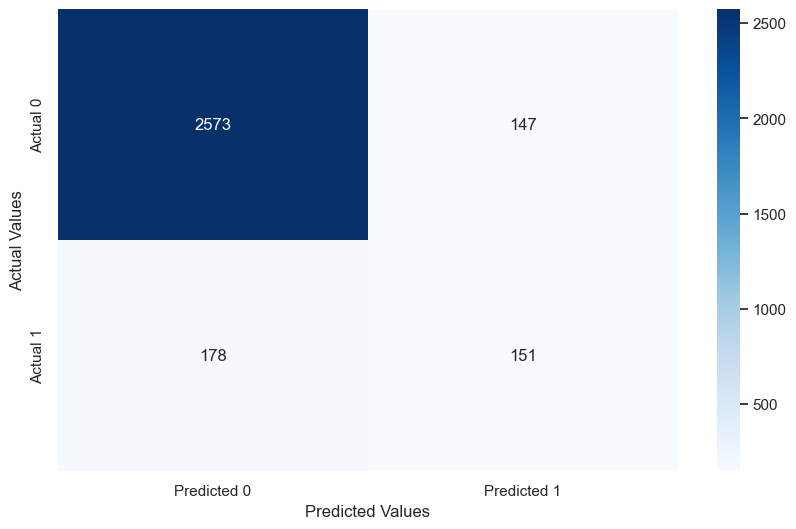

In [37]:
confusion_matrix_data(train,train.y_dum,logit_model_Baseline,0.3)

## Our Model

In [21]:
logit_model = sm.logit(formula = 'y_dum~age+I(age**2)+job+marital+education+month+day_of_week', data = train).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.316528
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  y_dum   No. Observations:                 3049
Model:                          Logit   Df Residuals:                     3029
Method:                           MLE   Df Model:                           19
Date:                Thu, 02 Mar 2023   Pseudo R-squ.:                 0.07478
Time:                        16:37:45   Log-Likelihood:                -965.09
converged:                       True   LL-Null:                       -1043.1
Covariance Type:            nonrobust   LLR p-value:                 1.513e-23
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.8157      0.816     -1.000      0.317      -2.414       0.783
job[T.Unemployed]          0.2842      0.189      1.502      0.133      -0.087       0.655
marital[T.single]          0.1215      0.131      0.924      0.355      -0.136       0.379
education[T.Secondary]     0.4136      0.165      2.514      0.012       0.091       0.736
education[T.Tertiary]      0.5685      0.167      3.401      0.001       0.241       0.896
month[T.aug]              -0.5175      0.291     -1.777      0.076      -1.088       0.053
month[T.dec]               1.0542      0.597      1.767      0.077      -0.115       2.224
month[T.jul]              -0.5385      0.291     -1.851      0.064      -1.109       0.032
month[T.jun]               0.0334      0.287      0.116      0.907      -0.529       0.596
month[T.mar]               1.8476      0.422      4.374      0.000       1.020       2.676
month[T.may]              -0.6904      0.274     -2.519      0.012      -1.228      -0.153
month[T.nov]              -0.2497      0.299     -0.835      0.403      -0.835       0.336
month[T.oct]               1.1312      0.387      2.923      0.003       0.373       1.890
month[T.sep]               1.0952      0.402      2.727      0.006       0.308       1.882
day_of_week[T.mon]         0.2415      0.194      1.246      0.213      -0.138       0.621
day_of_week[T.thu]         0.0958      0.200      0.479      0.632      -0.296       0.487
day_of_week[T.tue]         0.2570      0.199      1.292      0.196      -0.133       0.647
day_of_week[T.wed]         0.1190      0.207      0.574      0.566      -0.287       0.525
age                       -0.0834      0.034     -2.448      0.014      -0.150      -0.017
I(age ** 2)                0.0010      0.000      2.660      0.008       0.000       0.002
==========================================================================================
"""

Classification accuracy = 88.7%
Precision = 44.4%
TPR or Recall = 18.2%
FNR = 81.8%
FPR = 2.8%
ROC-AUC = 67.7%


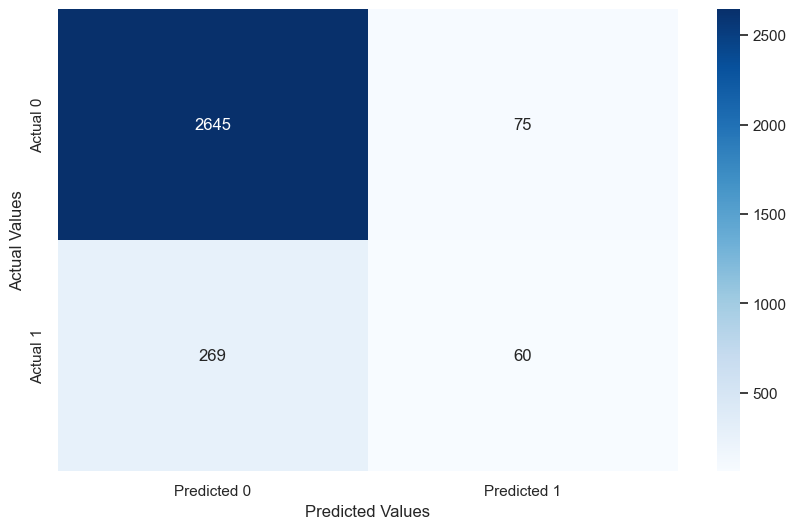

In [36]:
confusion_matrix_data(train,train.y_dum,logit_model,0.3)

Classification accuracy = 89.0%
Precision = 50.0%
TPR or Recall = 19.0%
FNR = 81.0%
FPR = 2.4%
ROC-AUC = 66.2%


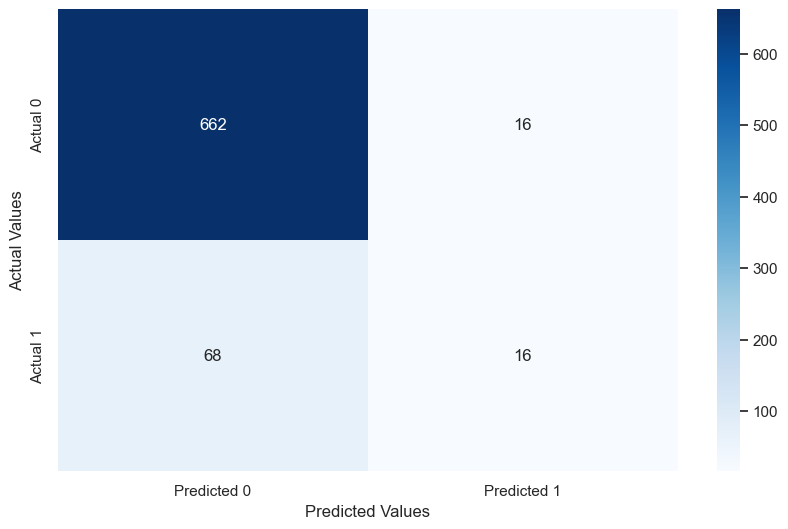

In [35]:
confusion_matrix_data(test,test.y_dum,logit_model,0.3)

0.6770058555337028


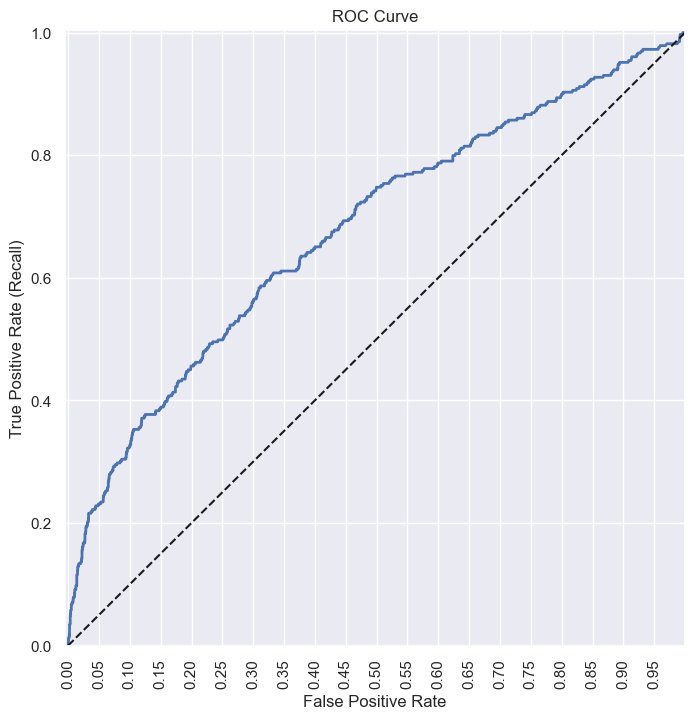

In [24]:
y=train.y_dum
ypred = logit_model.predict(train)
fpr, tpr, auc_thresholds = roc_curve(y, ypred)
print(auc(fpr, tpr))# AUC of ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

fpr, tpr, auc_thresholds = roc_curve(y, ypred)
plot_roc_curve(fpr, tpr)

## Taking account for class imbalance

In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTENC

Text(0.5, 1.0, 'Has the client subscribed a term deposit?')

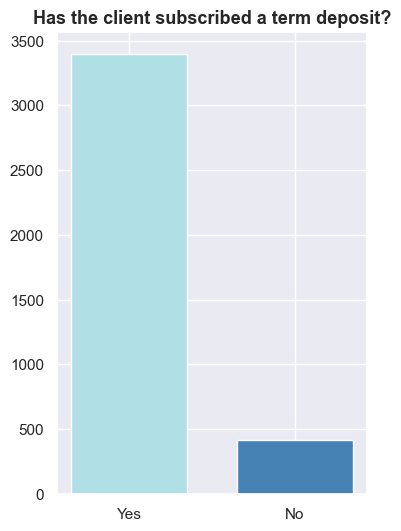

In [26]:
Subscription = {'Yes':3398, 'No':413}
YN = list(Subscription.keys())
Counts = list(Subscription.values())
  
fig = plt.figure(figsize = (4, 6))

# creating the bar plot
plt.bar(YN, Counts, color = ['powderblue', 'steelblue'], width = 0.7)
 
plt.title("Has the client subscribed a term deposit?",fontdict={'fontsize': '13', 'fontweight' : 'bold'})

In [27]:
X=data.iloc[:,:19]
y=data.iloc[:,19]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [28]:
## Balancing the train data
sm_nc = SMOTENC(categorical_features=[1,2,3,4,5,6,7,8,13], random_state=20)
X_train_res, y_train_res = sm_nc.fit_resample(X_train, y_train)

Y = pd.DataFrame(y_train_res, columns=["y_dum"])
train_smote = pd.concat([X_train_res, Y], axis = 1) 
train_smote = train_smote.reindex(columns=["age", "job", "marital", "education", "housing", "loan", "contact", "month", 'day_of_week', "duration", "campaign", "pdays", "previous", "poutcome", "emp_var_rate", "cons_price_idx", "cons_conf_idx","euribor3m", "nr_employed", "y_dum"])
train_smote.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y_dum
0,32,Unemployed,single,Tertiary,no,no,telephone,may,fri,21,3,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
1,51,Employed,married,Secondary,yes,no,telephone,jun,mon,81,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0
2,31,Unemployed,single,Tertiary,yes,no,cellular,jul,tue,309,1,6,3,success,-1.7,94.215,-40.3,0.835,4991.6,1
3,26,Employed,married,Primary,yes,no,telephone,jun,wed,71,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,0
4,31,Employed,single,Primary,no,no,cellular,jul,wed,1432,5,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,0


In [29]:
## Balancing the test data
sm_nc = SMOTENC(categorical_features=[1,2,3,4,5,6,7,8,13], random_state=20)
X_test_res, y_test_res = sm_nc.fit_resample(X_test, y_test)

Y = pd.DataFrame(y_test_res, columns=["y_dum"])
test_smote = pd.concat([X_test_res, Y], axis = 1) 
test_smote = train_smote.reindex(columns=["age", "job", "marital", "education", "housing", "loan", "contact", "month", 'day_of_week', "duration", "campaign", "pdays", "previous", "poutcome", "emp_var_rate", "cons_price_idx", "cons_conf_idx","euribor3m", "nr_employed", "y_dum"])
test_smote.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y_dum
0,32,Unemployed,single,Tertiary,no,no,telephone,may,fri,21,3,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
1,51,Employed,married,Secondary,yes,no,telephone,jun,mon,81,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0
2,31,Unemployed,single,Tertiary,yes,no,cellular,jul,tue,309,1,6,3,success,-1.7,94.215,-40.3,0.835,4991.6,1
3,26,Employed,married,Primary,yes,no,telephone,jun,wed,71,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,0
4,31,Employed,single,Primary,no,no,cellular,jul,wed,1432,5,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,0


### Testing SMOTE for Baseline Model

In [30]:
logit_model_s = sm.logit(formula = 'y_dum~age+job+marital+education+housing+loan+contact+month+day_of_week+campaign+pdays+previous+poutcome+euribor3m+emp_var_rate+cons_price_idx+cons_conf_idx+nr_employed', data = train_smote).fit()
logit_model_s.summary()

Optimization terminated successfully.
         Current function value: 0.475435
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  y_dum   No. Observations:                 5450
Model:                          Logit   Df Residuals:                     5418
Method:                           MLE   Df Model:                           31
Date:                Thu, 02 Mar 2023   Pseudo R-squ.:                  0.3141
Time:                        16:37:47   Log-Likelihood:                -2591.1
converged:                       True   LL-Null:                       -3777.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -121.9435     34.639     -3.520      0.000    -189.835     -54.052
job[T.Unemployed]          -1.0400      0.138     -7.552      0.000      -1.310      -0.770
marital[T.single]          -0.1438      0.075     -1.925      0.054      -0.290       0.003
education[T.Secondary]      0.3397      0.088      3.860      0.000       0.167       0.512
education[T.Tertiary]       0.1786      0.094      1.907      0.057      -0.005       0.362
housing[T.yes]              0.1958      0.072      2.736      0.006       0.056       0.336
loan[T.yes]                -1.6190      0.137    -11.854      0.000      -1.887      -1.351
contact[T.telephone]       -1.3499      0.133    -10.158      0.000      -1.610      -1.089
month[T.aug]                0.4481      0.204      2.198      0.028       0.049       0.848
month[T.dec]                1.0828      0.570      1.900      0.057      -0.034       2.200
month[T.jul]                0.3076      0.194      1.587      0.112      -0.072       0.687
month[T.jun]                0.5795      0.193      3.009      0.003       0.202       0.957
month[T.mar]                0.8601      0.368      2.335      0.020       0.138       1.582
month[T.may]                0.0560      0.159      0.352      0.725      -0.256       0.368
month[T.nov]               -0.7117      0.206     -3.459      0.001      -1.115      -0.308
month[T.oct]                1.0562      0.290      3.643      0.000       0.488       1.624
month[T.sep]               -0.7577      0.328     -2.312      0.021      -1.400      -0.115
day_of_week[T.mon]          0.1149      0.107      1.076      0.282      -0.094       0.324
day_of_week[T.thu]         -0.1789      0.110     -1.631      0.103      -0.394       0.036
day_of_week[T.tue]         -0.0630      0.113     -0.557      0.578      -0.285       0.159
day_of_week[T.wed]         -0.1432      0.117     -1.222      0.222      -0.373       0.086
poutcome[T.nonexistent]     1.3839      0.184      7.527      0.000       1.024       1.744
poutcome[T.success]         4.3391      0.678      6.396      0.000       3.010       5.669
age                         0.0087      0.004      2.384      0.017       0.002       0.016
campaign                   -0.2872      0.027    -10.810      0.000      -0.339      -0.235
pdays                       0.0009      0.001      1.312      0.190      -0.000       0.002
previous                   -0.3533      0.127     -2.781      0.005      -0.602      -0.104
euribor3m                   0.6705      0.209      3.206      0.001       0.261       1.080
emp_var_rate               -1.2607      0.164     -7.686      0.000      -1.582      -0.939
cons_price_idx              1.5893      0.219      7.260      0.000       1.160       2.018
cons_conf_idx               0.0375      0.014      2.633      0.008       0.010       0.065
nr_employed                -0.0057      0.003     -1.703      0.089      -0.012       0.001
=====================

Classification accuracy = 69.9%
Precision = 64.4%
TPR or Recall = 88.6%
FNR = 11.4%
FPR = 48.9%
ROC-AUC = 85.0%


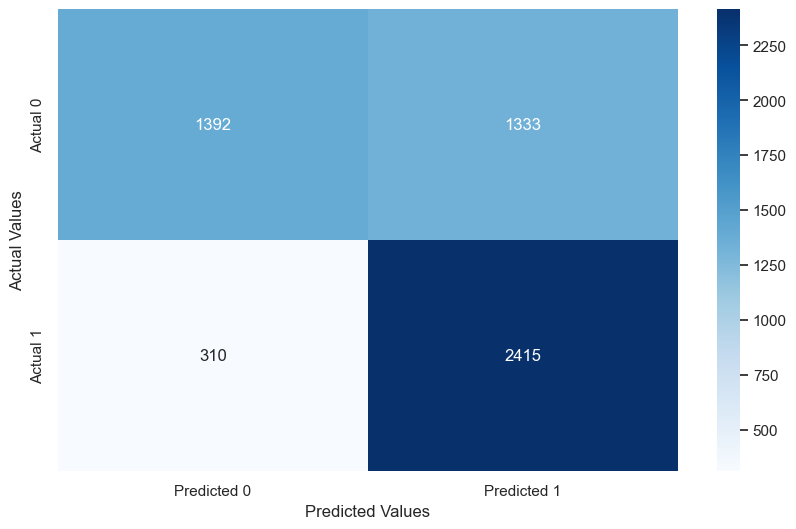

In [34]:
confusion_matrix_data(train_smote,train_smote.y_dum,logit_model_s,0.3)

Classification accuracy = 69.9%
Precision = 64.4%
TPR or Recall = 88.6%
FNR = 11.4%
FPR = 48.9%
ROC-AUC = 85.0%


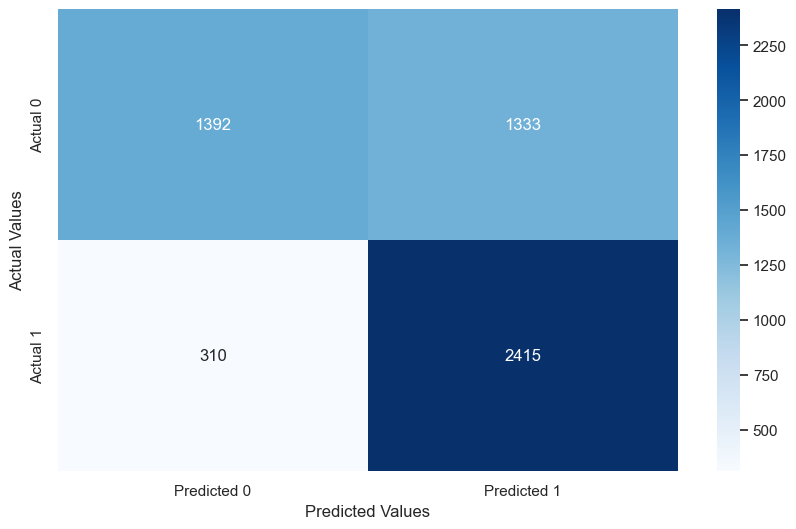

In [33]:
confusion_matrix_data(test_smote,test_smote.y_dum,logit_model_s,0.3)

### Stepwise selection

Disregard "pdays","emp_var_rate","cons_price_idx","euribor3m","nr_employed","poutcome" because their VIFs are larger than 5.

In [227]:
#
X = train[['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'euribor3m']]

In [39]:
train.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'y_dum'],
      dtype='object')

In [228]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.logit('y_dum~' + '+'.join(predictor_subset),data = train).fit()
    bic = model.bic
    return {"model":model, "bic":bic}

### best subset selection

In [239]:
X.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'euribor3m'],
      dtype='object')

In [229]:
#Function to select the best model amongst all models with 'k' predictors
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['bic'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

In [230]:
#Function to select the best model amongst the best models for 'k' predictors, where k = 1,2,3,..
models_best = pd.DataFrame(columns=["bic", "model"])

tic = time.time()
for i in range(1,1+X.shape[1]):
    models_best.loc[i] = getBest_model(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Optimization terminated successfully.
         Current function value: 0.341328
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.339294
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.341242
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.339726
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.342109
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.342016
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.331038
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.321318
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.341496
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.338542
  

Optimization terminated successfully.
         Current function value: 0.304851
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.313216
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303939
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300587
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.320954
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.318639
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.298108
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304669
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296405
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284758
  

Optimization terminated successfully.
         Current function value: 0.303670
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300114
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.320873
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.318530
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.298096
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304644
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296393
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284694
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.337138
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.311387
  

Optimization terminated successfully.
         Current function value: 0.307964
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.288030
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305822
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.295746
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287338
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339199
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.339099
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.329450
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.319502
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.338542
  

Optimization terminated successfully.
         Current function value: 0.319332
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.316959
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.297168
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303662
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295491
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284378
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.335266
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.310351
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.316881
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.308335
  

Optimization terminated successfully.
         Current function value: 0.305991
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304963
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287446
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295538
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286384
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284045
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.327775
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304543
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.312711
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303571
  

Optimization terminated successfully.
         Current function value: 0.316766
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.308205
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.300282
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.328254
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.320384
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.338515
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.335557
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.310054
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.316733
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.308168
  

Optimization terminated successfully.
         Current function value: 0.306717
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299852
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.307389
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.308452
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.288281
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.306472
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.296239
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287519
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.338453
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.328628
  

Optimization terminated successfully.
         Current function value: 0.307650
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300171
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.308203
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.309354
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.288479
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.307293
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.296477
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287724
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.306102
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.329681
  

Optimization terminated successfully.
         Current function value: 0.295875
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287193
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.307307
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.288587
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287734
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286303
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.335841
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.335757
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.326427
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.318215
  

Optimization terminated successfully.
         Current function value: 0.318066
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.315687
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296336
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302614
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294689
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284243
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.332123
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.308298
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.314397
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.306331
  

Optimization terminated successfully.
         Current function value: 0.304287
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286986
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294894
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285930
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283976
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.325508
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303026
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.310788
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302052
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299009
  

Optimization terminated successfully.
         Current function value: 0.303523
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295293
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284372
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.334697
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.309868
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.316504
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.307893
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299536
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.307897
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.314901
  

Optimization terminated successfully.
         Current function value: 0.304828
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287292
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295435
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286237
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284031
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.327198
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304054
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.312285
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303094
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299886
  

Optimization terminated successfully.
         Current function value: 0.308318
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287749
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.306360
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295493
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287055
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305604
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.329088
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.326960
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304122
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.312205
  

Optimization terminated successfully.
         Current function value: 0.287241
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304456
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294859
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286502
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.306381
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287869
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287087
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285729
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.306300
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.330344
  

Optimization terminated successfully.
         Current function value: 0.287195
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.307440
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.288564
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287740
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286287
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305940
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304879
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287375
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295482
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286303
  

Optimization terminated successfully.
         Current function value: 0.303281
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287471
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301180
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295552
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286613
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301345
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302143
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287244
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300094
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295409
  

Optimization terminated successfully.
         Current function value: 0.301718
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299034
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.319625
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.317323
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.297183
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303659
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295526
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284619
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.333812
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.309052
  

Optimization terminated successfully.
         Current function value: 0.302213
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299208
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.320128
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.317802
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.297449
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303876
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295763
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284561
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.335070
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.309878
  

Optimization terminated successfully.
         Current function value: 0.295205
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295757
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.276663
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294002
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.281804
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275707
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.307734
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.314400
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305966
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299130
  

Optimization terminated successfully.
         Current function value: 0.302783
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299638
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.320257
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.317932
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.297587
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304265
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295903
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284541
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.335625
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.310329
  

Optimization terminated successfully.
         Current function value: 0.275681
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.308085
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.315157
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.306328
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299406
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.307105
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.308135
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.288004
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.306172
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.295826
  

Optimization terminated successfully.
         Current function value: 0.286847
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304705
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303629
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286780
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294762
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285700
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283581
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.325318
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303499
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.311265
  

Optimization terminated successfully.
         Current function value: 0.307218
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.296456
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287688
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305660
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304598
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287190
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295336
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286118
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283844
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.327051
  

Optimization terminated successfully.
         Current function value: 0.284460
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296173
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302680
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294500
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283850
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295694
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296193
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.276629
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294468
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.281791
  

Optimization terminated successfully.
         Current function value: 0.274773
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.306095
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.307071
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287707
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305118
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295448
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286899
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.307032
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.288307
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287456
  

Optimization terminated successfully.
         Current function value: 0.315751
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.307246
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.299826
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.307290
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.314254
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305614
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299365
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.306102
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.307265
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.287653
  

Optimization terminated successfully.
         Current function value: 0.305869
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.307003
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.287549
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304925
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.295182
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286842
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304369
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305389
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287140
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303382
  

Optimization terminated successfully.
         Current function value: 0.294107
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285258
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283599
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.323583
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302055
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.309445
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301036
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.297389
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300790
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.308395
  

Optimization terminated successfully.
         Current function value: 0.305244
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304203
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286819
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294799
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285761
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283861
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.325472
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302894
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.310729
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301920
  

Optimization terminated successfully.
         Current function value: 0.294020
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283866
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295139
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295674
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.276578
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293919
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.281738
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275614
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.307670
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.314374
  

Optimization terminated successfully.
         Current function value: 0.305729
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303698
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294653
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286360
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305530
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.287675
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286906
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285428
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303983
  

Optimization terminated successfully.
         Current function value: 0.283741
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.326019
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303556
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.311482
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302552
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.298711
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302266
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.310416
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301375
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.298470
  

Optimization terminated successfully.
         Current function value: 0.295334
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286060
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283915
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.327156
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303908
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.312208
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302941
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299763
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302645
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.311192
  

Optimization terminated successfully.
         Current function value: 0.294192
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283896
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295398
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295869
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.276609
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294165
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.281810
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275631
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.308531
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.315696
  

Optimization terminated successfully.
         Current function value: 0.306578
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287611
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304658
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295466
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286840
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.306580
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.288219
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287399
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285980
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305001
  

Optimization terminated successfully.
         Current function value: 0.287414
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.306053
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295004
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286695
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305315
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.306273
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287030
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304386
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294710
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286281
  

Optimization terminated successfully.
         Current function value: 0.284173
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280956
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274462
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302235
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.310108
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301278
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.297955
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301751
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302610
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286728
  

Optimization terminated successfully.
         Current function value: 0.295976
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284412
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296108
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302670
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294430
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283811
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295618
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296119
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.276474
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294385
  

Optimization terminated successfully.
         Current function value: 0.294479
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.276496
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275563
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274586
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.306204
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.307219
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287662
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305245
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295541
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286879
  

Optimization terminated successfully.
         Current function value: 0.305521
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.288045
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287176
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285767
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286424
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286188
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294017
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285062
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283186
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286263
  

Optimization terminated successfully.
         Current function value: 0.323166
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301757
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.309399
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300805
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.297444
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.317687
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.315302
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296104
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302455
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294475
  

Optimization terminated successfully.
         Current function value: 0.305975
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.307089
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.287675
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305025
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.295419
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286944
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305001
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303947
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286767
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294737
  

Optimization terminated successfully.
         Current function value: 0.308179
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.314297
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.306208
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.297904
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.306187
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.312678
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304486
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.297424
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305169
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.306238
  

Optimization terminated successfully.
         Current function value: 0.304022
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293668
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285810
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303370
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304299
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286117
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302391
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293308
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285364
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304265
  

Optimization terminated successfully.
         Current function value: 0.306455
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.307625
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.287595
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305506
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.295232
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286862
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304937
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305991
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287176
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303941
  

Optimization terminated successfully.
         Current function value: 0.284119
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.281082
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274572
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301466
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.309282
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300543
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.298153
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300872
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301765
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286661
  

Optimization terminated successfully.
         Current function value: 0.307155
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.298590
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.307073
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.314029
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305363
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.298137
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.306252
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.307210
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287192
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305341
  

Optimization terminated successfully.
         Current function value: 0.306943
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287059
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305088
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294488
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286285
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304350
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305174
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286648
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303386
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294143
  

Optimization terminated successfully.
         Current function value: 0.299314
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.307062
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.308092
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287843
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.306123
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.295715
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287063
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305469
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.306390
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287429
  

Optimization terminated successfully.
         Current function value: 0.283269
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286255
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285996
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275678
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284282
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.281123
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274565
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301914
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.310109
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300990
  

Optimization terminated successfully.
         Current function value: 0.306022
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.298373
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.306835
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.307853
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287412
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305933
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295009
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286660
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304633
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303558
  

Optimization terminated successfully.
         Current function value: 0.294472
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285858
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.316112
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296759
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303166
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295037
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283977
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295091
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301515
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293456
  

Optimization terminated successfully.
         Current function value: 0.275252
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293200
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293503
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275701
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.291965
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280778
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274700
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293711
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.276337
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275406
  

Optimization terminated successfully.
         Current function value: 0.304172
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286927
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294971
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285817
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283640
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286186
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294189
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285090
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283191
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286312
  

Optimization terminated successfully.
         Current function value: 0.274537
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302615
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.310816
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301693
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.298867
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302136
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302982
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287274
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300905
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295283
  

Optimization terminated successfully.
         Current function value: 0.286238
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284761
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299832
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287011
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285969
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284518
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285063
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293908
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294281
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275927
  

Optimization terminated successfully.
         Current function value: 0.304163
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.297694
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304826
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305889
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286738
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303910
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294086
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286064
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304146
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303105
  

Optimization terminated successfully.
         Current function value: 0.299814
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.307208
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.314204
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305538
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299343
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.306037
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.307191
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.287623
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305097
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.295446
  

Optimization terminated successfully.
         Current function value: 0.298534
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300642
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301523
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286745
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299385
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294711
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285923
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.316935
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296908
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303328
  

Optimization terminated successfully.
         Current function value: 0.294708
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295200
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.276495
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293475
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.281626
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275534
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293314
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293718
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275978
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292064
  

Optimization terminated successfully.
         Current function value: 0.302288
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294350
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283941
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294418
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300698
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292827
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283353
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294070
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294527
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.276106
  

Optimization terminated successfully.
         Current function value: 0.285429
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304253
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286750
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286013
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284628
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302719
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286047
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293738
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284945
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283375
  

Optimization terminated successfully.
         Current function value: 0.302834
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.310705
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301864
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.298888
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301583
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.309688
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300723
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.298592
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300980
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301891
  

Optimization terminated successfully.
         Current function value: 0.286705
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285766
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284218
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295468
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301780
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293791
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283666
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294937
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295458
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.276349
  

Optimization terminated successfully.
         Current function value: 0.293519
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293940
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275919
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292263
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.281052
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274919
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293919
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.276518
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275598
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274613
  

Optimization terminated successfully.
         Current function value: 0.305475
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.328701
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.326596
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303654
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.311889
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302701
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299143
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.318996
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.316618
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296791
  

Optimization terminated successfully.
         Current function value: 0.287560
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286769
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285417
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305068
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304011
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286816
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294885
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285743
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283671
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.325944
  

Optimization terminated successfully.
         Current function value: 0.300284
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294393
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285787
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300380
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301109
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286385
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299171
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294231
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285537
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300614
  

Optimization terminated successfully.
         Current function value: 0.294075
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.281689
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275454
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.308494
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.315678
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.306720
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299884
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.307399
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.308492
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.288103
  

Optimization terminated successfully.
         Current function value: 0.304595
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295339
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286650
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.306524
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.288045
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287221
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285794
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304934
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287673
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286802
  

Optimization terminated successfully.
         Current function value: 0.286216
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286027
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293899
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284908
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283169
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286119
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285881
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275570
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284154
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280983
  

Optimization terminated successfully.
         Current function value: 0.295034
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283998
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295122
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301611
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293476
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283401
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294804
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295224
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.276175
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293587
  

Optimization terminated successfully.
         Current function value: 0.293681
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.276201
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275273
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274333
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304977
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305901
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286691
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304032
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294212
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285919
  

Optimization terminated successfully.
         Current function value: 0.285355
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304330
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287127
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286291
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284968
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285668
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285655
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293403
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284523
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282834
  

Optimization terminated successfully.
         Current function value: 0.287227
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300965
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295387
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286352
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301892
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286983
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299844
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295230
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286087
  

Optimization terminated successfully.
         Current function value: 0.285028
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293824
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294201
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275749
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292551
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280902
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274735
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294245
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.276355
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275419
  

Optimization terminated successfully.
         Current function value: 0.284290
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275557
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274481
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273462
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283637
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275198
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274102
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273104
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273628
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299710
  

Optimization terminated successfully.
         Current function value: 0.305656
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286590
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303717
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293891
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285873
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303856
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302788
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286130
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293967
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285064
  

Optimization terminated successfully.
         Current function value: 0.307054
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.287535
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304986
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.295329
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286799
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304929
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303873
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286608
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294645
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285550
  

Optimization terminated successfully.
         Current function value: 0.316865
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296904
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303324
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295199
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284389
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295307
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301747
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293682
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283779
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294834
  

Optimization terminated successfully.
         Current function value: 0.293706
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275954
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292058
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.281093
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274957
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293699
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.276551
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275629
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274653
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303944
  

Optimization terminated successfully.
         Current function value: 0.294524
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.276083
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292874
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.281230
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275133
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305912
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.312236
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304149
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296992
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304923
  

Optimization terminated successfully.
         Current function value: 0.293684
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284882
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283283
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285260
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292908
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284171
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282826
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285408
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285151
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275347
  

Optimization terminated successfully.
         Current function value: 0.300970
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301867
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286723
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299695
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294698
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285864
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.317369
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.297191
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303563
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295458
  

Optimization terminated successfully.
         Current function value: 0.293690
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.281508
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275375
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293513
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293950
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275815
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292266
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280990
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274816
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293902
  

Optimization terminated successfully.
         Current function value: 0.304623
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305640
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287067
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303619
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294604
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286290
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305458
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.287631
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286841
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285373
  

Optimization terminated successfully.
         Current function value: 0.284035
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.332979
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.309051
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.315681
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.307088
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.298577
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.306990
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.313976
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305284
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.298115
  

Optimization terminated successfully.
         Current function value: 0.301794
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.297843
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301443
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.309539
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300538
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.297542
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301131
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301875
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286483
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299935
  

Optimization terminated successfully.
         Current function value: 0.292971
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283220
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294394
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294760
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.276180
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293163
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.281268
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275203
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292943
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293215
  

Optimization terminated successfully.
         Current function value: 0.286577
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.306318
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.288022
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287145
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285744
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303881
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286685
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294775
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285580
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283601
  

Optimization terminated successfully.
         Current function value: 0.294026
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284936
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283191
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286188
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285919
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275599
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284205
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.281053
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274477
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301840
  

Optimization terminated successfully.
         Current function value: 0.275640
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274554
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273544
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300103
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300754
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286378
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.298807
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294308
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285431
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300267
  

Optimization terminated successfully.
         Current function value: 0.287108
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305659
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294569
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286333
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304890
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305772
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286690
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303927
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294224
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285884
  

Optimization terminated successfully.
         Current function value: 0.303105
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286435
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294330
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285307
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283298
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285674
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293515
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284560
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282825
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285878
  

Optimization terminated successfully.
         Current function value: 0.280230
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273769
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283988
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275431
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274351
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273373
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299968
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300623
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285815
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.298705
  

Optimization terminated successfully.
         Current function value: 0.294154
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.281505
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275333
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293951
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294333
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275780
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292679
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280969
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274757
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294379
  

Optimization terminated successfully.
         Current function value: 0.285826
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285413
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286035
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293866
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284893
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283042
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286147
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285887
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275497
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284160
  

Optimization terminated successfully.
         Current function value: 0.274908
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273969
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274622
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274093
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285348
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304465
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.325789
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.323747
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301809
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.309560
  

Optimization terminated successfully.
         Current function value: 0.285912
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302041
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293248
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285181
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303912
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286519
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285776
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284392
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304100
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303031
  

Optimization terminated successfully.
         Current function value: 0.296547
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299648
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300477
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285610
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.298420
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293021
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284793
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.298618
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299337
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285341
  

Optimization terminated successfully.
         Current function value: 0.294757
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295260
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.276370
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293519
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.281603
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275399
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.306913
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.313708
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305177
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.298931
  

Optimization terminated successfully.
         Current function value: 0.302995
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294343
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285954
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304854
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.287296
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286517
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285050
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303304
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286896
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286067
  

Optimization terminated successfully.
         Current function value: 0.293326
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284500
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283114
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285673
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285449
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275484
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283715
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280885
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274387
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285010
  

Optimization terminated successfully.
         Current function value: 0.283279
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294002
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294449
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.276034
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292794
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.281204
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275082
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305939
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.312298
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304180
  

Optimization terminated successfully.
         Current function value: 0.304021
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285727
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302100
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292901
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284971
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304014
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286331
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285581
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284192
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302396
  

Optimization terminated successfully.
         Current function value: 0.283935
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284617
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285055
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292605
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283933
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282705
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285170
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284913
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275200
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283241
  

Optimization terminated successfully.
         Current function value: 0.285607
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299687
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300462
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286195
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.298358
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294131
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285315
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299689
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286681
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285738
  

Optimization terminated successfully.
         Current function value: 0.293719
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275690
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292047
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280828
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274690
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293707
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.276287
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275369
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274377
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292273
  

Optimization terminated successfully.
         Current function value: 0.283859
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275466
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274409
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273373
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283202
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275102
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274025
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273008
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273526
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.298236
  

Optimization terminated successfully.
         Current function value: 0.285703
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293676
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284610
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282944
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285868
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285605
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275335
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283916
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280809
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274234
  

Optimization terminated successfully.
         Current function value: 0.300860
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.297867
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301377
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302200
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286590
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300211
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294376
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285751
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300293
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301010
  

Optimization terminated successfully.
         Current function value: 0.284219
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299148
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286338
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285375
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283998
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284586
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292826
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293108
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275591
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.291566
  

Optimization terminated successfully.
         Current function value: 0.305491
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.306445
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287405
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304527
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295324
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286622
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.306458
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.288021
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287193
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285770
  

Optimization terminated successfully.
         Current function value: 0.285378
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285087
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275118
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283415
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280536
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273982
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284364
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275624
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274543
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273527
  

Optimization terminated successfully.
         Current function value: 0.285885
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285620
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275279
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283928
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280750
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274171
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302004
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.309989
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301048
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.297788
  

Optimization terminated successfully.
         Current function value: 0.285879
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.298914
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293600
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284986
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300405
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286435
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285485
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284062
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299267
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286208
  

Optimization terminated successfully.
         Current function value: 0.274430
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303986
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286794
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285955
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284635
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285342
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284955
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284820
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284496
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274796
  

Optimization terminated successfully.
         Current function value: 0.275755
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274773
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273822
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274489
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305141
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287562
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286689
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285282
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285955
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285554
  

Optimization terminated successfully.
         Current function value: 0.297329
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.317619
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.315202
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295963
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302367
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294322
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283972
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.330801
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.307507
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.313776
  

Optimization terminated successfully.
         Current function value: 0.284996
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283417
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.322528
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301409
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.308927
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300406
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296972
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300114
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.307828
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299216
  

Optimization terminated successfully.
         Current function value: 0.298530
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285713
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284789
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283379
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294011
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300241
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292393
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283163
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293728
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294133
  

Optimization terminated successfully.
         Current function value: 0.304719
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.294968
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286546
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304149
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305113
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286861
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303136
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294603
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286076
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304960
  

Optimization terminated successfully.
         Current function value: 0.284541
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285201
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303490
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286474
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294359
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285374
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283635
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285724
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293568
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284635
  

Optimization terminated successfully.
         Current function value: 0.284674
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275080
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283006
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280474
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273957
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283927
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275576
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274508
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273481
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.298969
  

Optimization terminated successfully.
         Current function value: 0.304087
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296981
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304870
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305905
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286339
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303924
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293541
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285602
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303262
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304181
  

Optimization terminated successfully.
         Current function value: 0.302325
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285861
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285037
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283699
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284395
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302445
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285942
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293651
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284826
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283228
  

Optimization terminated successfully.
         Current function value: 0.280494
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274067
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284458
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284138
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274788
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282533
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280103
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273679
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283477
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275306
  

Optimization terminated successfully.
         Current function value: 0.295386
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301708
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293698
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283565
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294851
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295371
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.276279
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293612
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.281450
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275299
  

Optimization terminated successfully.
         Current function value: 0.275764
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274804
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273839
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274493
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303624
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286840
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285999
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284562
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285218
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284794
  

Optimization terminated successfully.
         Current function value: 0.286047
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285068
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283579
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284112
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283857
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292136
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275826
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274873
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273918
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274567
  

Optimization terminated successfully.
         Current function value: 0.301060
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.308983
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300089
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296910
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300768
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301496
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285974
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299548
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293660
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285060
  

Optimization terminated successfully.
         Current function value: 0.300305
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285873
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.298437
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293566
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284949
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299915
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286442
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285445
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284084
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294526
  

Optimization terminated successfully.
         Current function value: 0.280549
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274484
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293162
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.276133
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275191
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274271
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.291695
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275618
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274642
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273746
  

Optimization terminated successfully.
         Current function value: 0.285478
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304388
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.287340
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286420
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285054
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285731
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285673
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293613
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284543
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282945
  

Optimization terminated successfully.
         Current function value: 0.273458
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300042
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300684
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286350
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.298743
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294293
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285398
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300202
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286886
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285858
  

Optimization terminated successfully.
         Current function value: 0.300637
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.297131
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301251
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302027
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286179
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300038
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293849
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285267
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300102
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300766
  

Optimization terminated successfully.
         Current function value: 0.283756
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.298891
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285897
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284869
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283506
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284108
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292844
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293123
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275339
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.291579
  

Optimization terminated successfully.
         Current function value: 0.285046
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284636
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284655
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284286
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274707
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282693
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.279998
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273565
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283672
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275237
  

Optimization terminated successfully.
         Current function value: 0.285801
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285380
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285078
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284755
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274808
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283079
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280212
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273658
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284032
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275315
  

Optimization terminated successfully.
         Current function value: 0.285706
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.298542
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293317
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284902
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.315006
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.295772
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302107
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294092
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283883
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294156
  

Optimization terminated successfully.
         Current function value: 0.292443
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.281076
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274985
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292251
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292581
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275419
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.291011
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280564
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274438
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292699
  

Optimization terminated successfully.
         Current function value: 0.302678
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303574
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285765
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301687
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292931
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285017
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303607
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286369
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285622
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284247
  

Optimization terminated successfully.
         Current function value: 0.283748
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280898
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274287
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300773
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.308745
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299864
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.297978
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300242
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301093
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286281
  

Optimization terminated successfully.
         Current function value: 0.284843
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.298997
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286228
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285289
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283763
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.297944
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285970
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284998
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283503
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284048
  

Optimization terminated successfully.
         Current function value: 0.284512
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285169
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284751
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284746
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284465
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274948
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282790
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280300
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273829
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283706
  

Optimization terminated successfully.
         Current function value: 0.275978
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275067
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274111
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303034
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303955
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285706
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292889
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284946
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303956
  

Optimization terminated successfully.
         Current function value: 0.274040
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284438
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284135
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274747
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282513
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280084
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273641
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283457
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275263
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274217
  

Optimization terminated successfully.
         Current function value: 0.283639
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280713
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274143
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284933
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284657
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274868
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282957
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280315
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273738
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283887
  

Optimization terminated successfully.
         Current function value: 0.280250
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273776
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283796
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275399
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274332
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273296
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283118
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275017
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273929
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272915
  

Optimization terminated successfully.
         Current function value: 0.280654
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274462
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293398
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.276110
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275172
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274236
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304488
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305367
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286546
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303538
  

Optimization terminated successfully.
         Current function value: 0.285657
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285379
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275271
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283703
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280654
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274159
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284981
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284661
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274893
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283041
  

Optimization terminated successfully.
         Current function value: 0.284658
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282987
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285905
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285646
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275309
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283911
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280790
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274180
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285220
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284917
  

Optimization terminated successfully.
         Current function value: 0.284795
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274951
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283128
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280324
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273809
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284078
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275455
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274370
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273352
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283408
  

Optimization terminated successfully.
         Current function value: 0.273549
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274239
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303933
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286596
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285748
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284424
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285141
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284747
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284649
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284310
  

Optimization terminated successfully.
         Current function value: 0.273170
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283365
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274910
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273797
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272794
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273332
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299486
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286598
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285576
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284111
  

Optimization terminated successfully.
         Current function value: 0.302763
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303622
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285737
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301764
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293032
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284962
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.303661
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286361
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285572
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284222
  

Optimization terminated successfully.
         Current function value: 0.293568
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284700
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283209
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285063
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292769
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283965
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282733
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285240
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284954
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275246
  

Optimization terminated successfully.
         Current function value: 0.280091
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273648
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283358
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275280
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274222
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273227
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.298088
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.298722
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284870
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296786
  

Optimization terminated successfully.
         Current function value: 0.295034
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.276230
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293301
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.281420
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275245
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293134
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293519
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275686
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.291860
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280884
  

Optimization terminated successfully.
         Current function value: 0.284294
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284961
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284533
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285489
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293231
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284364
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282977
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285588
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285332
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275389
  

Optimization terminated successfully.
         Current function value: 0.275769
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274809
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273861
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274509
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273980
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284455
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302378
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285794
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293570
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284678
  

Optimization terminated successfully.
         Current function value: 0.283023
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280355
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273853
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284304
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283975
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274582
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282360
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.279962
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273464
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283310
  

Optimization terminated successfully.
         Current function value: 0.283492
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292155
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292462
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275356
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.290898
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280385
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274355
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292626
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275987
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275065
  

Optimization terminated successfully.
         Current function value: 0.283614
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284152
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293223
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293626
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275612
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.291947
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280750
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274597
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293612
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.276219
  

Optimization terminated successfully.
         Current function value: 0.272826
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273342
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272973
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283573
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273903
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302846
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286113
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294117
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284985
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283163
  

Optimization terminated successfully.
         Current function value: 0.280455
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273904
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284646
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284270
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274656
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282673
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280066
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273516
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283658
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275194
  

Optimization terminated successfully.
         Current function value: 0.284075
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292569
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292809
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275405
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.291288
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280468
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274383
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293069
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.276050
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275098
  

Optimization terminated successfully.
         Current function value: 0.283946
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284511
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293356
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293676
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275594
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292057
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280760
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274565
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293779
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.276214
  

Optimization terminated successfully.
         Current function value: 0.273349
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272982
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283867
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273886
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285234
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293045
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284080
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282490
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285448
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285120
  

Optimization terminated successfully.
         Current function value: 0.291578
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275296
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274315
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273406
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274090
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273560
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284149
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284592
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284213
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274631
  

Optimization terminated successfully.
         Current function value: 0.272798
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273327
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272944
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284163
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273848
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272862
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302536
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285768
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293575
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284661
  

Optimization terminated successfully.
         Current function value: 0.282993
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280398
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273891
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284284
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283975
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274616
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282348
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280017
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273510
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283287
  

Optimization terminated successfully.
         Current function value: 0.284324
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282921
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283491
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.291994
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292291
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275367
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.290729
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280423
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274375
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292444
  

Optimization terminated successfully.
         Current function value: 0.283745
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.297881
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285945
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284970
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283478
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284023
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292920
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.293289
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275581
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.291632
  

Optimization terminated successfully.
         Current function value: 0.273892
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284504
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282779
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274903
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273822
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272809
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273323
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272961
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283410
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273866
  

Optimization terminated successfully.
         Current function value: 0.283902
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282485
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283063
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282811
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.290912
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275224
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274277
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273341
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274014
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273488
  

Optimization terminated successfully.
         Current function value: 0.273695
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282862
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274861
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273769
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272757
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273278
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272897
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283570
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273806
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272819
  

Optimization terminated successfully.
         Current function value: 0.298588
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285729
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284746
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283366
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283969
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283742
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.291465
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275344
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274372
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273454
  

Optimization terminated successfully.
         Current function value: 0.273187
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272828
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283951
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273719
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283118
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274911
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273802
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272807
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273333
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272960
  

Optimization terminated successfully.
         Current function value: 0.283150
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280512
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273966
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299701
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.307302
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.298744
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296069
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.299323
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.300075
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285256
  

Optimization terminated successfully.
         Current function value: 0.296657
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292036
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283762
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.298099
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285215
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284270
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282855
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296988
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284939
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283968
  

Optimization terminated successfully.
         Current function value: 0.274229
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.301475
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285549
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284712
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283402
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284100
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283674
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284062
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283704
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274577
  

Optimization terminated successfully.
         Current function value: 0.273704
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274367
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.302807
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.286535
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285677
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284271
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284938
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284503
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284545
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284228
  

Optimization terminated successfully.
         Current function value: 0.284251
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283912
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274517
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282298
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.279900
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273391
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283256
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275048
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273979
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272977
  

Optimization terminated successfully.
         Current function value: 0.275057
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273985
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272988
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282443
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274669
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273578
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272606
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273157
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.297149
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284958
  

Optimization terminated successfully.
         Current function value: 0.273844
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284586
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284200
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274587
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282605
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.279999
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273439
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283599
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275132
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274035
  

Optimization terminated successfully.
         Current function value: 0.283446
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275131
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274030
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273054
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282754
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274744
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273625
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272675
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273232
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.298070
  

Optimization terminated successfully.
         Current function value: 0.274974
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273870
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272884
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282750
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274587
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273465
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272505
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273068
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.298488
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.285526
  

Optimization terminated successfully.
         Current function value: 0.283293
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.291925
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292222
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275192
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.290653
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280300
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274193
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292370
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275818
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274899
  

Optimization terminated successfully.
         Current function value: 0.273068
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272710
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282622
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273522
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284536
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284234
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274686
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282551
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.280105
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273548
  

Optimization terminated successfully.
         Current function value: 0.272854
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272495
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282482
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273324
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282211
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274529
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273448
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272464
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273004
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272629
  

Optimization terminated successfully.
         Current function value: 0.272939
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272571
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283427
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273366
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272432
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272586
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272596
         Iterations 7
Processed 1001 models on 10 predictors in 92.24083733558655 seconds.
Optimization terminated successfully.
         Current function value: 0.284653
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292330
         Iterations 7
Optimization 

Optimization terminated successfully.
         Current function value: 0.283644
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282265
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282851
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282584
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.290699
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275175
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274213
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273291
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273967
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273437
  

Optimization terminated successfully.
         Current function value: 0.283116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273642
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282656
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274802
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273696
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272695
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273218
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272834
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283290
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273744
  

Optimization terminated successfully.
         Current function value: 0.284254
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282918
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283527
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.283262
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.291206
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.275187
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274193
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273289
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273979
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273435
  

Optimization terminated successfully.
         Current function value: 0.282403
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273313
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282139
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274520
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273438
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272454
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272993
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272619
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282593
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273422
  

Optimization terminated successfully.
         Current function value: 0.273366
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272396
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272941
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272560
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282445
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273380
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.272454
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282491
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.274617
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.273503
  

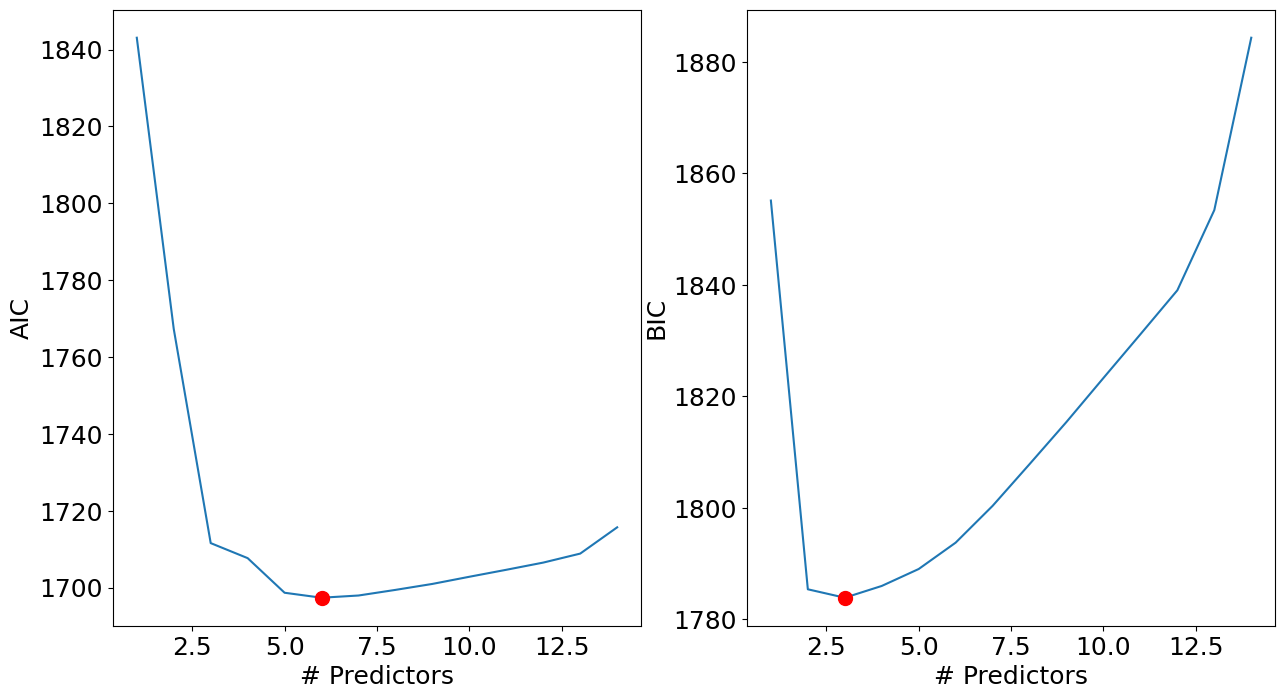

In [233]:
def best_sub_plots():
    plt.figure(figsize=(15,8))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(1, 2, 1)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(1, 2, 2)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
best_sub_plots()

## result of best subset selection

In [240]:
best_subset_model = models_best.loc[6,'model']
best_subset_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  y_dum   No. Observations:                 3049
Model:                          Logit   Df Residuals:                     3033
Method:                           MLE   Df Model:                           15
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                  0.2017
Time:                        09:07:59   Log-Likelihood:                -832.69
converged:                       True   LL-Null:                       -1043.1
Covariance Type:            nonrobust   LLR p-value:                 2.914e-80
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -1.8912      0.377     -5.016      0.000      -2.630      -1.152
contact[T.telephone]       -0.5222      0.214     -2.435      0.015      -0.943      -0.102
month[T.aug]                0.4919      0.319      1.542      0.123      -0.133       1.117
month[T.dec]                1.1306      0.628      1.801      0.072      -0.100       2.361
month[T.jul]                0.8956      0.333      2.687      0.007       0.242       1.549
month[T.jun]                1.3418      0.318      4.213      0.000       0.718       1.966
month[T.mar]                1.8271      0.432      4.229      0.000       0.980       2.674
month[T.may]               -0.1046      0.278     -0.376      0.707      -0.650       0.441
month[T.nov]                0.4980      0.326      1.528      0.126      -0.141       1.137
month[T.oct]                1.1559      0.395      2.929      0.003       0.382       1.929
month[T.sep]                0.7303      0.423      1.728      0.084      -0.098       1.559
poutcome[T.nonexistent]     0.8117      0.316      2.568      0.010       0.192       1.431
poutcome[T.success]         1.8011      0.280      6.431      0.000       1.252       2.350
campaign                   -0.0638      0.038     -1.691      0.091      -0.138       0.010
previous                    0.4493      0.188      2.385      0.017       0.080       0.818
euribor3m                  -0.4541      0.054     -8.452      0.000      -0.559      -0.349
===========================================================================================
"""

Classification accuracy = 89.9%
Precision = 54.8%
TPR or Recall = 35.0%
FNR = 65.0%
FPR = 3.5%
ROC-AUC = 78.4%


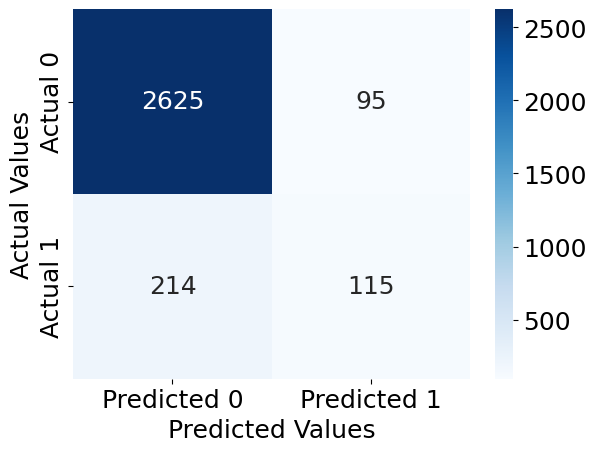

In [238]:
confusion_matrix_data(train,train.y_dum,best_subset_model,0.35)

Classification accuracy = 89.9%
Precision = 55.6%
TPR or Recall = 41.7%
FNR = 58.3%
FPR = 4.1%
ROC-AUC = 76.9%


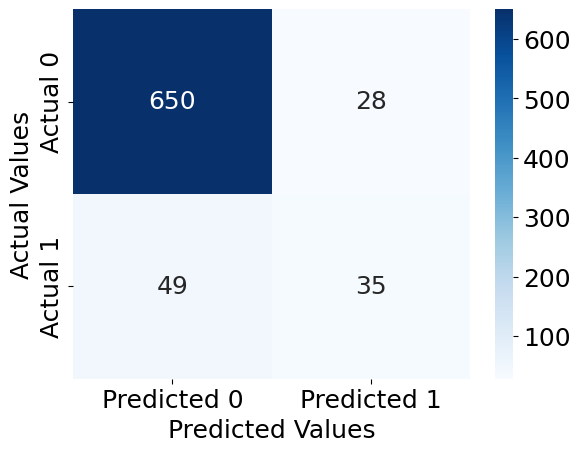

In [237]:
confusion_matrix_data(test,test.y_dum,best_subset_model,0.3)

# forward stepwise

data prepartion for stepwise selection
- dummify multilevel variables: education, poutcome
- bin variables: month
- rename & change in to 0 and 1s: job->employed, marital->married, housing, loan, contact->contact_cell

In [132]:
stepwise_data.poutcome.value_counts()

nonexistent    2621
failure         321
success         107
Name: poutcome, dtype: int64

In [141]:
stepwise_data.columns

Index(['age', 'housing', 'loan', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'y_dum', 'employed', 'married',
       'contact_cell', 'Secondary_edu', 'Tertiary_edu', 'failure_poutcome',
       'nonexistent_poutcome', 'success_poutcome', 'apr', 'aug', 'dec', 'jul',
       'jun', 'mar', 'may', 'nov', 'oct', 'sep'],
      dtype='object')

In [205]:
# create a copy for stepwise selection 
def stepwise_trans(data):
    stepwise_data = data.copy()

    stepwise_data['employed'] = stepwise_data['job'].replace({'Employed': 1, 'Unemployed': 0})
    stepwise_data['married'] = stepwise_data['marital'].replace({'married': 1, 'single': 0})
    stepwise_data['housing'] = stepwise_data['housing'].replace({'yes': 1, 'no': 0})
    stepwise_data['contact_cell'] = stepwise_data['contact'].replace({'cellular': 1, 'telephone': 0})
    stepwise_data['loan'] = stepwise_data['loan'].replace({'yes': 1, 'no': 0})

    # get dummies
    edu_dum = pd.get_dummies(stepwise_data.education, drop_first=True)
    stepwise_data = pd.concat([stepwise_data,edu_dum.add_suffix('_edu')], axis = 1)

    poutcome_dum = pd.get_dummies(stepwise_data.poutcome, drop_first=False)
    stepwise_data = pd.concat([stepwise_data,poutcome_dum.add_suffix('_poutcome')], axis = 1)

    stepwise_data = pd.concat([stepwise_data,pd.get_dummies(stepwise_data.month, drop_first=False)], axis = 1)

    stepwise_data = pd.concat([stepwise_data,pd.get_dummies(stepwise_data.day_of_week, drop_first=False)], axis = 1)

    stepwise_data = stepwise_data.drop(['marital', 'contact','job','education', 'poutcome'], axis = 1)
    return stepwise_data

In [248]:
stepwise_data = stepwise_trans(train)

In [249]:
X = stepwise_data[['age', 'housing', 'loan', 'day_of_week', 'campaign', 'previous', 
       'euribor3m', 'employed', 'married', 'contact_cell', 'Secondary_edu', 'Tertiary_edu', 'failure_poutcome',
       'nonexistent_poutcome', 'success_poutcome']]

In [250]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.logit('y_dum~' + '+'.join(predictor_subset),data = stepwise_data).fit()
    bic = model.bic
    return {"model":model, "bic":bic}

In [251]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
#    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['bic'].argmin()]
    
#    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [252]:
def forward_selection():
    models_best = pd.DataFrame(columns=["bic", "model"])

#    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

#    toc = time.time()
#    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [253]:
models_best = forward_selection()

Optimization terminated successfully.
         Current function value: 0.341328
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.342109
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.342016
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.341496
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.338542
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.318947
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.301587
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339294
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.341242
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.331038
  

Optimization terminated successfully.
         Current function value: 0.284995
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284995
         Iterations 7
Processed  9 models on 7 predictors.
Optimization terminated successfully.
         Current function value: 0.284812
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284692
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284875
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284560
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284765
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284818
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284607
         Iterations 7
Optimization terminated successfully.
       

/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.282957
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.282816
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.283010
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.282716
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.282958
         Iterations 7
Processed  5 models on 11 predictors.
Optimization terminated successfully.
         Current function value: 0.282730
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.282793
         Iterations 9
         Current function value: 0.282485
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.282739
         Iterations 7
Processed  4 models on 12 predictors.
         Current function value: 0.282707

/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.282405
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.282588
         Iterations 8
Processed  3 models on 13 predictors.
Optimization terminated successfully.
         Current function value: 0.282565
         Iterations 7
         Current function value: 0.282265
         Iterations: 35
Processed  2 models on 14 predictors.
Optimization terminated successfully.
         Current function value: 0.282248
         Iterations 12
Processed  1 models on 15 predictors.


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [254]:
def best_sub_plots():
    plt.figure(figsize=(15,8))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 1x2 grid so we can look at 4 plots at once

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(1, 2, 1)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(1, 2, 2)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')

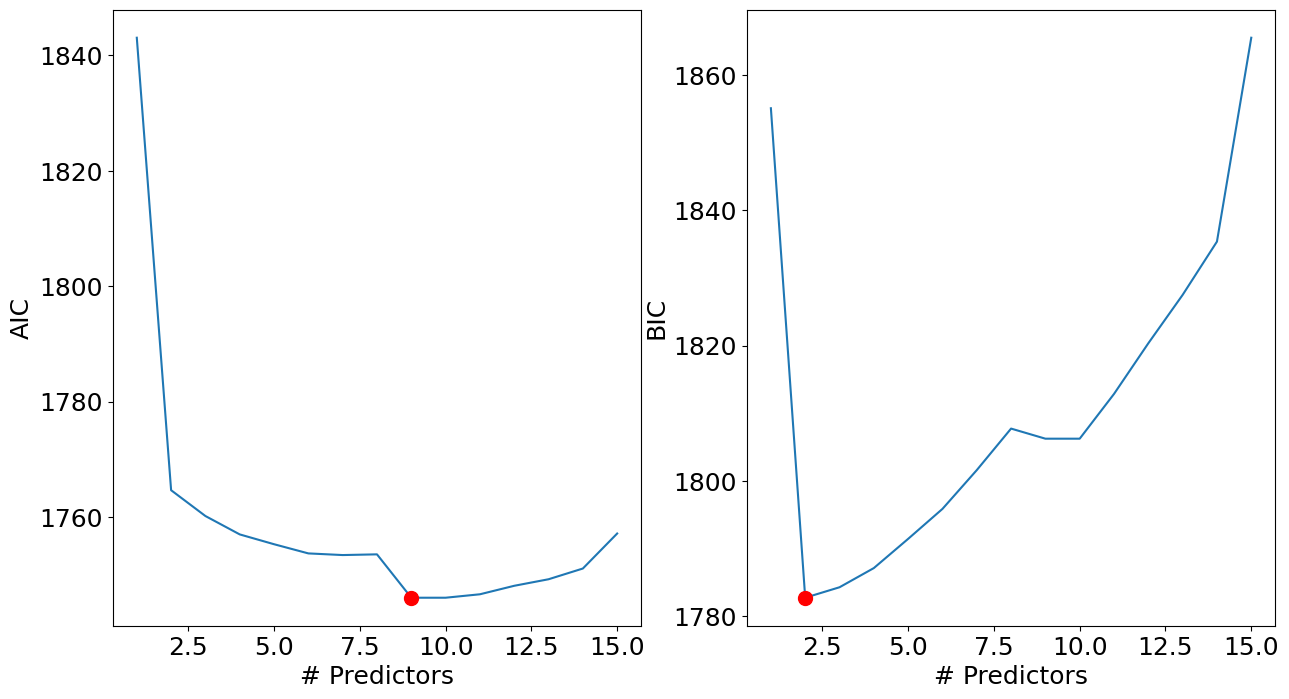

In [255]:
best_sub_plots()

In [256]:
best_fwd_reg_model = models_best['model'][8]
best_fwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  y_dum   No. Observations:                 3049
Model:                          Logit   Df Residuals:                     3040
Method:                           MLE   Df Model:                            8
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                  0.1681
Time:                        09:23:12   Log-Likelihood:                -867.77
converged:                       True   LL-Null:                       -1043.1
Covariance Type:            nonrobust   LLR p-value:                 6.556e-71
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.0001      0.283     -3.539      0.000      -1.554      -0.446
euribor3m           -0.3954      0.041     -9.536      0.000      -0.477      -0.314
success_poutcome     1.8152      0.230      7.881      0.000       1.364       2.267
contact_cell         0.3990      0.177      2.252      0.024       0.052       0.746
employed            -0.4531      0.175     -2.584      0.010      -0.797      -0.109
Tertiary_edu         0.4021      0.168      2.392      0.017       0.073       0.732
campaign            -0.0691      0.038     -1.825      0.068      -0.143       0.005
Secondary_edu        0.2557      0.167      1.529      0.126      -0.072       0.584
failure_poutcome    -0.2529      0.187     -1.352      0.176      -0.620       0.114
====================================================================================
"""

Classification accuracy = 77.4%
Precision = 27.2%
TPR or Recall = 65.3%
FNR = 34.7%
FPR = 21.1%
ROC-AUC = 76.2%


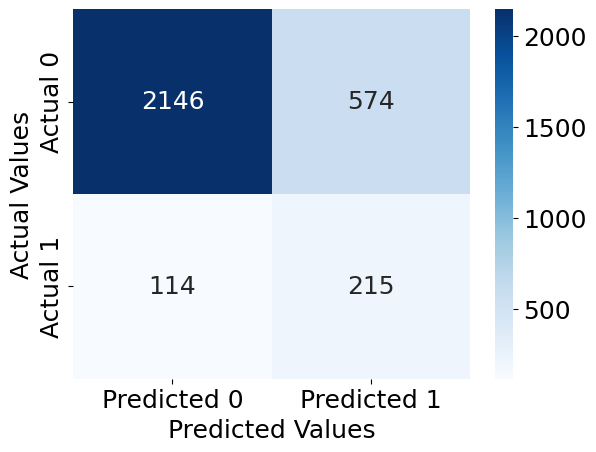

In [259]:
confusion_matrix_data(stepwise_data,stepwise_data.y_dum,best_fwd_reg_model,0.15)

Classification accuracy = 90.2%
Precision = 64.5%
TPR or Recall = 23.8%
FNR = 76.2%
FPR = 1.6%
ROC-AUC = 75.5%


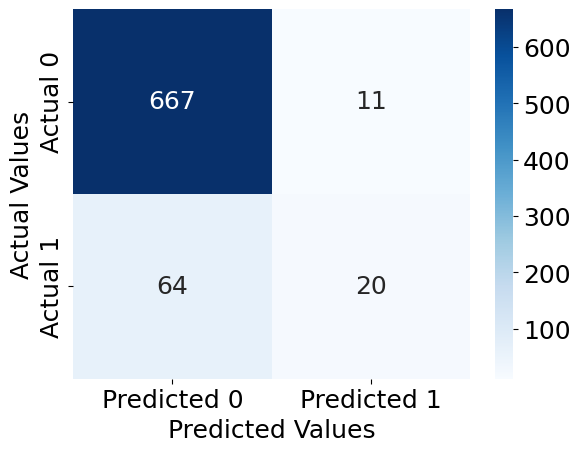

In [218]:
# test on test data
stepwise_data = stepwise_trans(test)
confusion_matrix_data(stepwise_data,stepwise_data.y_dum,best_fwd_reg_model,0.3)

### trying to use Lindsay's code

In [104]:
#
X = ['age', 'job', 'marital', 'education', 'housing']

In [98]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
# Fit model on feature_set and calculate R-squared
    model = sm.logit('y_dum~' + '+'.join(predictor_subset),data = train).fit()
    bic = model.bic
    return {"model":model, "bic":bic}

In [105]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):
# Pull out predictors we still need to process
    remaining_predictors = [p for p in X if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
# Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
# Choose the model with the highest RSS
    best_model = models.loc[models['bic'].argmin(),]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
# Return the best model, along with some other useful information about the model
    return best_model

In [107]:
def forward_selection():
    models_best = pd.DataFrame(columns=["bic", "model"])
    tic = time.time()
    predictors = []
    for i in range(1,len(X)+1):
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])
    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

### Backward stepwise

In [150]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.logit('y_dum~' + '+'.join(predictor_subset),data = stepwise_data).fit()
    bic = model.bic
    return {"model":model, "bic":bic}

In [137]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['bic'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [144]:
def backward_selection():
    models_best = pd.DataFrame(columns=["bic", "model"], index = range(1,len(X.columns)))

    tic = time.time()
    predictors = X.columns
    models_best.loc[len(predictors)] = processSubset(predictors)
    
    while(len(predictors) > 1):  
        models_best.loc[len(predictors)-1] = backward(predictors)
        predictors = models_best.loc[len(predictors)-1]["model"].params.index[1:]

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [175]:
X = stepwise_data[['age', 'housing', 'loan', 'day_of_week', 'campaign','previous', 
       'euribor3m', 'employed', 'married', 'contact_cell', 'Secondary_edu', 'Tertiary_edu', 'failure_poutcome',
       'nonexistent_poutcome', 'success_poutcome', 'apr', 'aug', 'dec', 'jul',
       'jun', 'mar', 'may', 'nov', 'oct', 'sep']]

In [168]:
X = stepwise_data[['age', 'housing', 'loan', 'campaign','previous', 
       'euribor3m', 'employed', 'married', 'contact_cell', 'Secondary_edu', 'Tertiary_edu', 'failure_poutcome',
       'nonexistent_poutcome', 'success_poutcome']]


In [169]:
X_backup = stepwise_data[['age', 'housing', 'loan','campaign','previous', 
       'euribor3m', 'employed', 'married', 'contact_cell', 'Secondary_edu', 'Tertiary_edu', 'failure_poutcome',
       'nonexistent_poutcome', 'success_poutcome']]

In [170]:
#Including 2-factor interactions of predictors in train and 'X'. Note that we need train to develop the model, and X to 
#find 'k' variable subsets from amongst all the predictors under consideration
for combo in itertools.combinations(X_backup.columns, 2):    
    stepwise_data['_'.join(combo)] = stepwise_data[combo[0]]*stepwise_data[combo[1]]
#    test['_'.join(combo)] = test[combo[0]]*test[combo[1]]
    X.loc[:,'_'.join(combo)] = stepwise_data.loc[:,'_'.join(combo)] 

/var/folders/w7/qjsfghxn7ls91k1g955hqdp80000gn/T/ipykernel_71820/588094684.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = stepwise_data.loc[:,'_'.join(combo)]
/var/folders/w7/qjsfghxn7ls91k1g955hqdp80000gn/T/ipykernel_71820/588094684.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = stepwise_data.loc[:,'_'.join(combo)]
/var/folders/w7/qjsfghxn7ls91k1g955hqdp80000gn/T/ipykernel_71820/588094684.py:6: SettingWithCopyWarning: 
A value is trying to be 

In [173]:
models_best = backward_selection()

         Current function value: 0.266566
         Iterations: 35


LinAlgError: Singular matrix

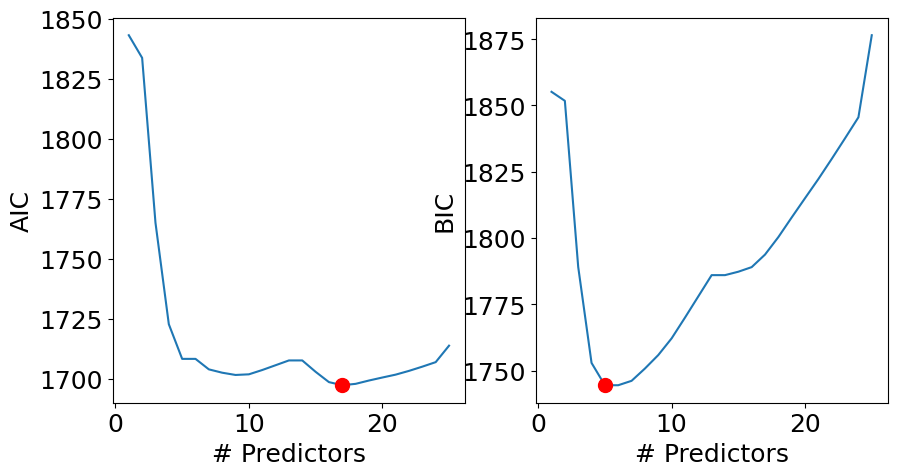

In [154]:
def best_sub_plots():
    plt.figure(figsize=(10,5))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(1, 2, 1)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = model_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(1, 2, 2)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
best_sub_plots()

In [160]:
best_subset_model = model_best.loc[11,'model']
model_best.loc[11,'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  y_dum   No. Observations:                 3049
Model:                          Logit   Df Residuals:                     3038
Method:                           MLE   Df Model:                           10
Date:                Thu, 02 Mar 2023   Pseudo R-squ.:                  0.1939
Time:                        22:12:12   Log-Likelihood:                -840.86
converged:                      False   LL-Null:                       -1043.1
Covariance Type:            nonrobust   LLR p-value:                 1.049e-80
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0127   4.83e+06  -2.63e-09      1.000   -9.48e+06    9.48e+06
euribor3m               -0.5303      0.046    -11.590      0.000      -0.620      -0.441
failure_poutcome        -0.6849   4.83e+06  -1.42e-07      1.000   -9.48e+06    9.48e+06
nonexistent_poutcome    -0.4789   4.83e+06  -9.91e-08      1.000   -9.48e+06    9.48e+06
success_poutcome         1.1511   4.83e+06   2.38e-07      1.000   -9.48e+06    9.48e+06
apr                     -0.6864      0.281     -2.441      0.015      -1.237      -0.135
dec                      0.2684      0.584      0.459      0.646      -0.877       1.414
jul                      0.4140      0.217      1.905      0.057      -0.012       0.840
jun                      0.5269      0.209      2.519      0.012       0.117       0.937
mar                      1.1639      0.381      3.053      0.002       0.417       1.911
may                     -0.8208      0.183     -4.483      0.000      -1.180      -0.462
oct                      0.4645      0.339      1.371      0.171      -0.200       1.129
========================================================================================
"""

Classification accuracy = 89.6%
Precision = 53.4%
TPR or Recall = 31.3%
FNR = 68.7%
FPR = 3.3%
ROC-AUC = 78.2%


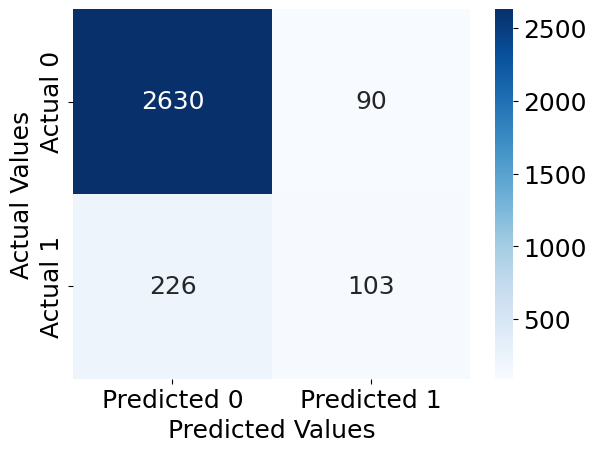

In [174]:
confusion_matrix_data(stepwise_data,stepwise_data.y_dum,best_subset_model,0.35)